In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
import imageio
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset/sp1s_aa_train.csv', delimiter=";")
data.head()

,class,F3_1,F3_2,F3_3,F3_4,F3_5,F3_6,F3_7,F3_8,F3_9,...,O2_41,O2_42,O2_43,O2_44,O2_45,O2_46,O2_47,O2_48,O2_49,O2_50
0,0.0,41.8,44.8,47.1,37.4,40.1,40.6,43.8,43.1,62.8,...,40.1,43.0,46.5,46.3,43.6,36.7,40.7,30.7,40.6,33.1
1,1.0,132.0,137.0,148.0,137.1,153.1,143.1,145.1,140.0,143.1,...,-27.5,-24.5,-31.5,-43.1,-48.7,-53.0,-59.5,-44.6,-31.7,-19.1
2,0.0,69.4,57.0,76.4,52.0,63.0,45.0,63.3,56.8,71.5,...,11.9,22.4,22.0,38.9,26.1,18.6,0.2,15.9,2.2,22.3
3,1.0,53.2,52.5,46.9,51.1,45.1,52.9,57.3,69.1,66.6,...,34.4,31.1,31.0,14.9,31.0,20.8,18.0,4.4,11.7,14.1
4,0.0,55.6,55.8,58.3,62.3,71.5,83.0,93.6,99.1,98.6,...,26.9,23.0,5.6,12.4,8.3,16.8,14.5,27.4,16.4,23.9


In [3]:
labels = [
    'left',
    'right'
]
eletrodes = ['F3', 'F1', 'Fz', 'F2', 'F4', 'FC5', 'FC3', 'FC1', 'FCz',
             'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4',
             'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6',
             'O1', 'O2']


In [5]:
def split_eletrodes(data):
    lb = data[0]
    sign_eletrode = []
    index_1 = 1
    index_2 = 51

    for e in eletrodes:
        sign_eletrode.append(data[index_1:index_2])
        index_1 += 50
        index_2 += 50
    
    return lb, sign_eletrode

def plot_graph(lb, features, eletrode):
    title = labels[int(lb)]
    index_eletrode = eletrodes.index(eletrode)

    plt.clf()
    plt.title(eletrode + ' - ' + title)
    plt.plot(features[index_eletrode], linestyle="-", marker="x")
    plt.show()



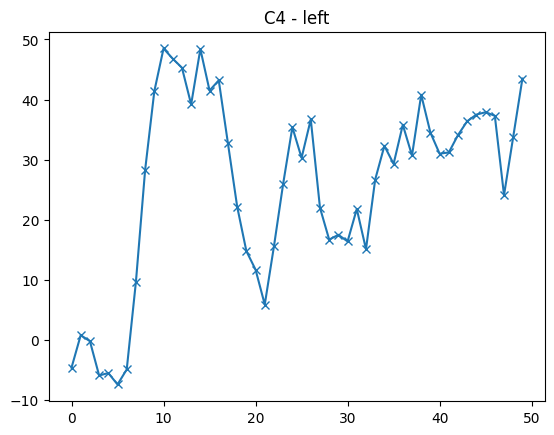

In [6]:
lb, sign = split_eletrodes(data.loc[0].to_numpy())
plot_graph(lb, sign, 'C4')






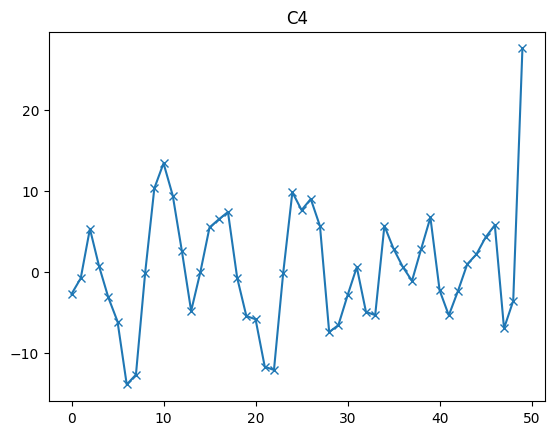

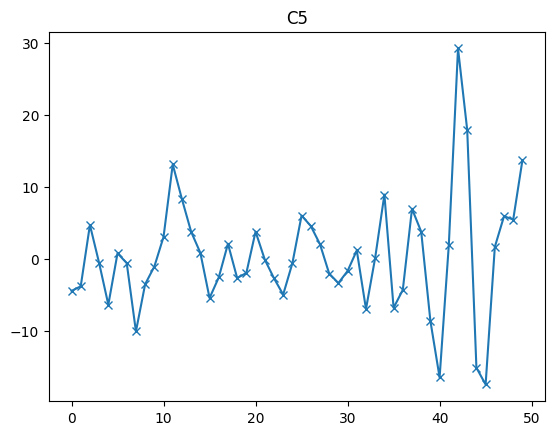

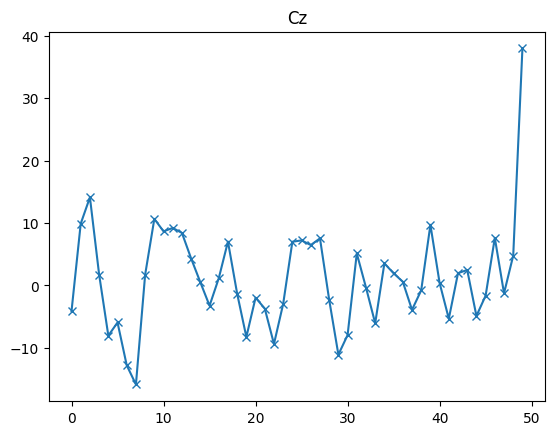

In [6]:
lb, sign = split_eletrodes(data.loc[0].to_numpy())
eletrode = 'C4'
index_eletrode = eletrodes.index(eletrode)

widths = np.arange(1, 31)
cwtmatr = signal.cwt(sign[index_eletrode], signal.ricker, widths)

plt.clf()
plt.title(eletrode)
plt.plot(cwtmatr[0], linestyle="-", marker="x")
plt.show()

eletrode = 'C5'
index_eletrode = eletrodes.index(eletrode)

widths = np.arange(1, 31)
cwtmatr = signal.cwt(sign[index_eletrode], signal.ricker, widths)
plt.clf()
plt.title(eletrode)
plt.plot(cwtmatr[0], linestyle="-", marker="x")
plt.show()

eletrode = 'Cz'
index_eletrode = eletrodes.index(eletrode)

widths = np.arange(1, 31)
cwtmatr = signal.cwt(sign[index_eletrode], signal.ricker, widths)
plt.clf()
plt.title(eletrode)
plt.plot(cwtmatr[0], linestyle="-", marker="x")
plt.show()



In [149]:
cwt_features = []
label_list = []
widths = np.arange(1, 31)
indx_C4 = eletrodes.index('C4')
indx_C5 = eletrodes.index('C5')
indx_Cz = eletrodes.index('Cz')
cont = 0 
for row in data.iloc:
    lb, sign = split_eletrodes(row.to_numpy())
   
    cwtmatr_C4 = (signal.cwt(sign[indx_C4], signal.morlet, widths))/255.0
    cwtmatr_C5 = (signal.cwt(sign[indx_C5], signal.morlet, widths))/255.0
    cwtmatr_Cz = (signal.cwt(sign[indx_Cz], signal.morlet, widths))/255.0
    
    img_stack = np.vstack([cwtmatr_C4, cwtmatr_Cz, cwtmatr_C5])
    
    img = np.zeros((np.array(img_stack).shape[0], np.array(img_stack).shape[1], 3 ))
    
    img[:,:,0] = img_stack
    img[:,:,1] = img_stack
    img[:,:,2] = img_stack
    
    
    label_list.append(int(lb))
    cwt_features.append(img)
    #imageio.imwrite('images/outfile'+str(cont)+'_'+str(int(lb))+'.png', np.vstack([cwtmatr_C4, cwtmatr_Cz, cwtmatr_C5]))
    cont += 1 

C:\Users\arthu\AppData\Local\Temp\ipykernel_3984\1000521552.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  img[:,:,0] = img_stack
C:\Users\arthu\AppData\Local\Temp\ipykernel_3984\1000521552.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  img[:,:,1] = img_stack
C:\Users\arthu\AppData\Local\Temp\ipykernel_3984\1000521552.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  img[:,:,2] = img_stack


In [150]:
print(len(cwt_features))
print(len(cwt_features[0]))
print(len(cwt_features[0][0]))
print(len(cwt_features[0][0][0]))

316
90
50
3


In [151]:
# data 90x50
features_train = []
labels_train = []
features_test = []
labels_test = []

for i in range(len(cwt_features)):
    if(i < 80):
        features_test.append(cwt_features[i])
        labels_test.append(label_list[i])
    else:
        features_train.append(cwt_features[i])
        labels_train.append(label_list[i])

features_train = np.array(features_train).reshape((236, 90, 50, 3))
features_test = np.array(features_test).reshape((80, 90, 50, 3))


In [152]:
model_base = models.Sequential()
model_base.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(90, 50, 3)))
model_base.add(layers.MaxPooling2D((2, 2)))
model_base.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_base.add(layers.MaxPooling2D((2, 2)))
model_base.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_base.add(layers.Flatten())
model_base.add(layers.Dense(1, activation='sigmoid'))     
model_base.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 88, 48, 32)        896       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 44, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 42, 22, 64)        18496     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 21, 11, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 19, 9, 64)         36928     
                                                                 
 flatten_8 (Flatten)         (None, 10944)           

In [153]:
img_generator = tf.keras.preprocessing.image.ImageDataGenerator()
features_train = img_generator.flow(
    features_train,
    y=np.array(labels_train),
    batch_size=16,
    
    shuffle=True)
features_test = img_generator.flow(
    features_test,
    y=np.array(labels_test),
    batch_size=16,
    
    shuffle=True)


In [155]:
model_base.compile(
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

#model_base.load('/models/model_base.h5')
history = model_base.fit(features_train.x, features_train.y, epochs=30, 
                    validation_data=(features_test.x, features_test.y))

model_base.save('./models/model_base.h5')

Epoch 1/30


C:\Users\arthu\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 3s 238ms/step - loss: 0.5695 - accuracy: 0.6992 - val_loss: 0.8751 - val_accuracy: 0.4750
Epoch 2/30
8/8 [==============================] - 2s 225ms/step - loss: 0.5370 - accuracy: 0.7331 - val_loss: 0.7679 - val_accuracy: 0.5125
Epoch 3/30
8/8 [==============================] - 2s 216ms/step - loss: 0.5058 - accuracy: 0.7203 - val_loss: 0.8573 - val_accuracy: 0.5250
Epoch 4/30
8/8 [==============================] - 2s 227ms/step - loss: 0.5156 - accuracy: 0.7797 - val_loss: 0.7732 - val_accuracy: 0.5750
Epoch 5/30
8/8 [==============================] - 2s 244ms/step - loss: 0.4677 - accuracy: 0.7627 - val_loss: 0.7870 - val_accuracy: 0.5250
Epoch 6/30
8/8 [==============================] - 2s 239ms/step - loss: 0.4696 - accuracy: 0.7712 - val_loss: 0.8605 - val_accuracy: 0.6000
Epoch 7/30
8/8 [==============================] - 2s 241ms/step - loss: 0.4864 - accuracy: 0.7585 - val_loss: 0.7715 - val_accuracy: 0.5625
Epoch 8/30
8/8 [===============

In [162]:
conv_base = tf.keras.applications.EfficientNetB3(
                  include_top=False,
                  input_shape=(90, 50, 3),
                  pooling='avg'
                  )

input_layer=tf.keras.Input(shape=(90,50,3))

x=conv_base(input_layer,training=True)

output=tf.keras.layers.Dense(units=1,activation='sigmoid')(x)
model_EffB3=tf.keras.Model(input_layer,output)
model_EffB3.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

In [163]:
#model_base.load('/models/model_EffB3.h5')
history = model_EffB3.fit(features_train.x, features_train.y, epochs=30, 
                    validation_data=(features_test.x, features_test.y))

model_EffB3.save('./models/model_EffB3.h5')

Epoch 1/30


C:\Users\arthu\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 42s 3s/step - loss: 0.8005 - accuracy: 0.5042 - val_loss: 0.8689 - val_accuracy: 0.5125
Epoch 2/30
8/8 [==============================] - 18s 2s/step - loss: 0.7580 - accuracy: 0.6314 - val_loss: 0.9308 - val_accuracy: 0.5375
Epoch 3/30
8/8 [==============================] - 18s 2s/step - loss: 0.7187 - accuracy: 0.6610 - val_loss: 0.9598 - val_accuracy: 0.4500
Epoch 4/30
8/8 [==============================] - 18s 2s/step - loss: 0.5410 - accuracy: 0.7627 - val_loss: 0.8794 - val_accuracy: 0.6250
Epoch 5/30
8/8 [==============================] - 18s 2s/step - loss: 0.4376 - accuracy: 0.7966 - val_loss: 1.1123 - val_accuracy: 0.6125
Epoch 6/30
8/8 [==============================] - 18s 2s/step - loss: 0.4297 - accuracy: 0.8178 - val_loss: 1.3982 - val_accuracy: 0.5500
Epoch 7/30
8/8 [==============================] - 18s 2s/step - loss: 0.3565 - accuracy: 0.8517 - val_loss: 1.5871 - val_accuracy: 0.4500
Epoch 8/30
8/8 [=============================

In [ ]:
conv_base = tf.keras.applications.EfficientNetB3(
                  include_top=False,
                  input_shape=(90, 50, 3),
                  pooling='avg'
                  )

input_layer=tf.keras.Input(shape=(90,50,3))

x=conv_base(input_layer,training=True)

output=tf.keras.layers.Dense(units=1,activation='sigmoid')(x)
model_EffB3=tf.keras.Model(input_layer,output)
model_EffB3.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])